Installing Spark, Kafka in google colab

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz

!pip install -q findspark

!pip install pyspark



!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install tensorflow-io
!pip install kafka-python


tar: spark-3.0.1-bin-hadoop2.7.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 44 kB/s 
     |████████████████████████████████| 199 kB 72.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845514 sha256=e6bd5d9855aad2871e533a4c897b4ec5d5f856866da41b4955a914677d6788c5
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark
tar: spark-3.1.1-bin-hadoop3.2.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.0 MB 1.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Intalling Geo Pandas

In [ ]:
!pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 13.6 MB/s 
     |████████████████████████████████| 16.7 MB 379 kB/s 
     |████████████████████████████████| 6.3 MB 41.8 MB/s 


Import  liberaries 

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import to_timestamp, current_timestamp
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, LongType
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer
from pyspark.sql import Row
from pyspark.sql.functions import *
from pyspark.sql.functions import to_timestamp, lit
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
import os
from datetime import datetime
import time
import threading
import json
from kafka import KafkaProducer
from kafka.errors import KafkaError
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
import tensorflow_io as tfio

from kafka import KafkaConsumer
from time import sleep 
import time 
import matplotlib
import matplotlib.pyplot as plt
import geopandas

from urllib.request import urlopen


Set the Streaming location of URL

In [ ]:
url = 'http://api.open-notify.org/iss-now.json'

Checking Tensor Flow Version 

In [ ]:
print("tensorflow-io version: {}".format(tfio.__version__))
print("tensorflow version: {}".format(tf.__version__))

tensorflow-io version: 0.27.0
tensorflow version: 2.9.2


Installing Zoo Keeper 

In [ ]:
!tar -zxf zookeeper-3.4.10.tar.gz



Download Kafka And Install

In [ ]:
!curl -sSOL https://downloads.apache.org/kafka/3.3.1/kafka_2.12-3.3.1.tgz
!tar -xzf kafka_2.12-3.3.1.tgz


Start the Kafka server with zookeeper

In [ ]:
!./kafka_2.12-3.3.1/bin/zookeeper-server-start.sh -daemon ./kafka_2.12-3.3.1/config/zookeeper.properties
!./kafka_2.12-3.3.1/bin/kafka-server-start.sh -daemon ./kafka_2.12-3.3.1/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


Information about kafka's zooKeeper 

In [ ]:
!ps -ef | grep kafka


root         707       1 16 00:14 ?        00:00:02 java -Xmx512M -Xms512M -server -XX:+UseG1GC -XX:MaxGCPauseMillis=20 -XX:InitiatingHeapOccupancyPercent=35 -XX:+ExplicitGCInvokesConcurrent -XX:MaxInlineLevel=15 -Djava.awt.headless=true -Xlog:gc*:file=/content/kafka_2.12-3.3.1/bin/../logs/zookeeper-gc.log:time,tags:filecount=10,filesize=100M -Dcom.sun.management.jmxremote -Dcom.sun.management.jmxremote.authenticate=false -Dcom.sun.management.jmxremote.ssl=false -Dkafka.logs.dir=/content/kafka_2.12-3.3.1/bin/../logs -Dlog4j.configuration=file:./kafka_2.12-3.3.1/bin/../config/log4j.properties -cp /content/kafka_2.12-3.3.1/bin/../libs/activation-1.1.1.jar:/content/kafka_2.12-3.3.1/bin/../libs/aopalliance-repackaged-2.6.1.jar:/content/kafka_2.12-3.3.1/bin/../libs/argparse4j-0.7.0.jar:/content/kafka_2.12-3.3.1/bin/../libs/audience-annotations-0.5.0.jar:/content/kafka_2.12-3.3.1/bin/../libs/commons-cli-1.4.jar:/content/kafka_2.12-3.3.1/bin/../libs/commons-lang3-3.12.0.jar:/content/kafka_2.1

Starting the Topic for ZooKeeper

In [ ]:
!./kafka_2.12-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic reco-train
!./kafka_2.12-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 2 --topic reco-test

Created topic reco-train.
Created topic reco-test.


In [ ]:
!curl -sSOL https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

Topic Information 

In [ ]:
!./kafka_2.12-3.3.1/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic reco-train
!./kafka_2.12-3.3.1/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic reco-test


Topic: reco-train	TopicId: 6yQL2Uj5TzmEWTbZSsj3xQ	PartitionCount: 1	ReplicationFactor: 1	Configs: 
	Topic: reco-train	Partition: 0	Leader: 0	Replicas: 0	Isr: 0
Topic: reco-test	TopicId: ol1KwRCqTY6IavY8osXFHQ	PartitionCount: 2	ReplicationFactor: 1	Configs: 
	Topic: reco-test	Partition: 0	Leader: 0	Replicas: 0	Isr: 0
	Topic: reco-test	Partition: 1	Leader: 0	Replicas: 0	Isr: 0


Kafka Producer

In [61]:
from time import sleep 
def serializer (messaqe):
  return json.dumps (data). encode ( 'utf-8')
# Kafka Producer

#producer = KafkaProducer(bootstrap_servers=['127.0.0.1:9092'])
producer = KafkaProducer(value_serializer=lambda v: json.dumps(v).encode('utf-8'))

har= pd.DataFrame()
dataframe= pd.DataFrame()

if 1 == 1:
  t_end = time.time() + 60  * 60
  while time.time() < t_end:
        response = urlopen(url)
        data_json = json.loads (response. read ())
        print(data_json)
        data = data_json
        output = data
        producer.send('data', data_json)
        sleep (5)
        producer.flush()


__main__
__mean__
{'timestamp': 1668657248, 'iss_position': {'latitude': '-49.5839', 'longitude': '72.4691'}, 'message': 'success'}
{'timestamp': 1668657253, 'iss_position': {'latitude': '-49.6759', 'longitude': '72.9254'}, 'message': 'success'}
{'timestamp': 1668657258, 'iss_position': {'latitude': '-49.7659', 'longitude': '73.3833'}, 'message': 'success'}
{'timestamp': 1668657263, 'iss_position': {'latitude': '-49.8540', 'longitude': '73.8430'}, 'message': 'success'}
{'timestamp': 1668657268, 'iss_position': {'latitude': '-49.9485', 'longitude': '74.3507'}, 'message': 'success'}
{'timestamp': 1668657273, 'iss_position': {'latitude': '-50.0324', 'longitude': '74.8141'}, 'message': 'success'}
{'timestamp': 1668657278, 'iss_position': {'latitude': '-50.1142', 'longitude': '75.2791'}, 'message': 'success'}
{'timestamp': 1668657283, 'iss_position': {'latitude': '-50.1939', 'longitude': '75.7458'}, 'message': 'success'}
{'timestamp': 1668657289, 'iss_position': {'latitude': '-50.2793', 'lo

Lattitude and Longitude of the Consumer 

In [62]:
dataframe[0:]

,latitude,longitude
0,-49.5839,72.4691
0,-49.6759,72.9254
0,-49.7659,73.3833
0,-49.8540,73.8430
0,-49.9485,74.3507
...,...,...
0,38.5232,-50.1889
0,38.3253,-49.8821
0,38.1067,-49.5466
0,37.9069,-49.2434


Kafka Consumer

In [ ]:
if __name__ == '__main__':
  consumer = KafkaConsumer('data', bootstrap_servers=['127.0.0.1:9092'])
  df = pd.DataFrame()
  t_end = time.time() + 20
  print(t_end)
  print(time.time())
  print(time.time() < t_end)
  print(data)
  print(consumer)
  for data in consumer:
    producer.close(timeout = 15)
    data = json.loads(data.value)
    d= data['iss_position']
    normalized_data=pd.json_normalize(d)
    df2 = pd.DataFrame(normalized_data)
    df = df.append(df2)
    if time.time() > t_end:
      break
      


Ploting the lattitude and Longitude in Geopandas

In [63]:
graphdataframe = geopandas.GeoDataFrame(dataframe, geometry = geopandas.points_from_xy(dataframe.longitude,dataframe.latitude))


Ploting the Graph

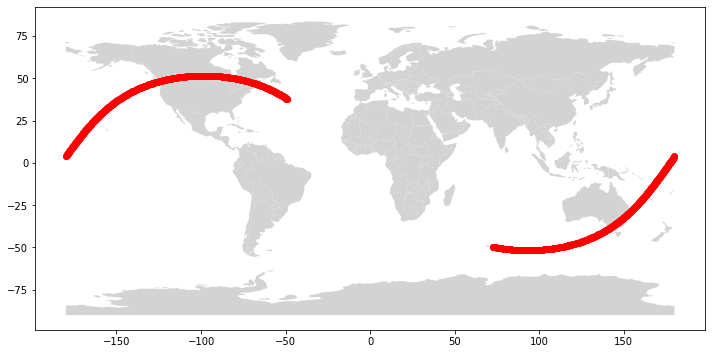

In [64]:
world = geopandas.read_file(
    geopandas.datasets.get_path("naturalearth_lowres")
)
fig, ax=plt.subplots(figsize=(12,6))
world.plot(color="lightgrey", ax=ax)
graphdataframe.plot(ax=ax,color='red')
plt.show()
